## **A**utomated **L**earning for **I**nsightful **C**omparison and **E**valuation - (ALICE)

This is a demo notebook where I demonstrate the main functionalities of the proposed python framework.

For demonstrational purposes, I will be using a simple and small dataset called California Housing, which includes 8 predictors and 1 target (`MedHouseVal`) - which is a house value. This amount of predictors is small for us but a small dataset helps to run the python framework in a short amount of time, so it is very suitable for demonstration purposes.

Because all of the variables in the dataset are continuous, I simulate a binary categorical column from MedHouseVal which just measures if house value is above average. 

I also generate a fake categorical variable just to demonstrate the framework's functionality to treat $n$ amount of columns obtained from dummy encoding of a categorical variable as one variable in feature selection process.

Further details are given in comments and markdown notes throughout the notebook.

In [2]:
# Import numpy for mathematical operations
import numpy as np
# Import pandas for handling data tables
import pandas as pd
# Import stats from scipy - the key statistical package (an extension of Numpy) for python
from scipy import stats

# import matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')

# This just saves the directory
import os
cur_dir = os.getcwd()
import pickle

# For upsampling
from imblearn.over_sampling import SMOTE

# For train-test split
from sklearn.model_selection import train_test_split

# For scaling
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline




## Cleaning 

In [9]:
# Import the dataset
df = pd.read_excel('Telco_customer_churn.xlsx')

In [ ]:
# Print general information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

## What the customer churn dataset includes:

**CustomerID**: A unique ID that identifies each customer.

**Count**: A value used in reporting/dashboarding to sum up the number of customers in a filtered set.

**Country**: The country of the customer’s primary residence.

**State**: The state of the customer’s primary residence.

**City**: The city of the customer’s primary residence.

**Zip Code**: The zip code of the customer’s primary residence.

**Lat Long**: The combined latitude and longitude of the customer’s primary residence.

**Latitude**: The latitude of the customer’s primary residence.

**Longitude**: The longitude of the customer’s primary residence.

**Gender**: The customer’s gender: Male, Female

**Senior Citizen**: Indicates if the customer is 65 or older: Yes, No

**Partner**: Indicate if the customer has a partner: Yes, No

**Dependents**: Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.

**Tenure Months**: Indicates the total amount of months that the customer has been with the company by the end of the quarter specified above.

**Phone Service**: Indicates if the customer subscribes to home phone service with the company: Yes, No

**Multiple Lines**: Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No

**Internet Service**: Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.

**Online Security**: Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No

**Online Backup**: Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No

**Tech Support**: Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No

**Streaming TV**: Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service.

**Streaming Movies**: Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service.

**Contract**: Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.

**Paperless Billing**: Indicates if the customer has chosen paperless billing: Yes, No

**Payment Method**: Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check

**Monthly Charge**: Indicates the customer’s current total monthly charge for all their services from the company.

**Total Charges**: Indicates the customer’s total charges, calculated to the end of the quarter specified above.

**Churn Label**: Yes = the customer left the company this quarter. No = the customer remained with the company. Directly related to Churn Value.

**Churn Value**: 1 = the customer left the company this quarter. 0 = the customer remained with the company. Directly related to Churn Label.

**Churn Score**: A value from 0-100 that is calculated using the predictive tool IBM SPSS Modeler. The model incorporates multiple factors known to cause churn. The higher the score, the more likely the customer will churn.

**CLTV**: Customer Lifetime Value. A predicted CLTV is calculated using corporate formulas and existing data. The higher the value, the more valuable the customer. High value customers should be monitored for churn.

**Churn Reason**: A customer’s specific reason for leaving the company. Directly related to Churn Category.

In [25]:
# replacing white spaces in column names with nothing 
df.columns = df.columns.str.replace(' ', '')

I begin with dropping variables we do not need

In [26]:
### axis=1 drops column, inplace=True makes sure the existing dataframe gets re-saved with the modification

initial_dataframe_columns = len(df.columns)

# We do not need Churn Label as it is the same as Churn Value
df.drop('ChurnLabel', axis=1, inplace=True)

# Drop customerId if its unique values == length of dataset
if df['CustomerID'].nunique() == len(df):
    print("Dropping CustomerID as no duplicate values observed:")
    df.drop('CustomerID', axis=1, inplace=True)
else:
    print('There are duplicate customer id values')

# Dropping Cities temporarily
df.drop('City', axis=1, inplace=True)

# Dropping country because every obseration is from U.S.
df.drop('Country', axis=1, inplace=True)

# Dropping state because every observation is from California
df.drop('State', axis=1, inplace=True)

df.drop('ZipCode', axis=1, inplace=True)

# Dropping count as its useless
df.drop('Count', axis=1, inplace=True)

# Drop LatLong as it just inclodes both Latitude and Longitude Together as a string
df.drop('LatLong', axis=1, inplace=True)

# Dropping ChurnReason for obvious reasons
df.drop('ChurnReason', axis=1, inplace=True)

print(f'\nDataframe columns reduced from {initial_dataframe_columns} to {len(df.columns)}.')

Dropping CustomerID as no duplicate values observed:

Dataframe columns reduced from 33 to 24.


We can begin by first identifying categorical variables:

In [27]:
# We can begin by looking for categorial variables in the dataset
cat_col = [feature for feature in df.columns if df[feature].dtype == 'object']

print(f'The following features are categorical:')
print('-'*100)
for feature in cat_col:
    print(feature)
print('-'*100)

The following features are categorical:
----------------------------------------------------------------------------------------------------
Gender
SeniorCitizen
Partner
Dependents
PhoneService
MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract
PaperlessBilling
PaymentMethod
TotalCharges
----------------------------------------------------------------------------------------------------


Now we can identify which of the features are binary, and which are multi-class. 

In [28]:
# Any variable that has 2 unique values is obviously a binary feature
binary_features = [feature for feature in df[cat_col] if df[feature].nunique() == 2]
# Anything else falls in multiclass
multiclass_features = [feature for feature in df[cat_col] if feature not in binary_features]

print(f'We have the following binary features:')
for feature in binary_features:
    print(feature)
print('-'*100)
print(f'We have the following multi-class features:')
for feature in multiclass_features:
    print(feature)

We have the following binary features:
Gender
SeniorCitizen
Partner
Dependents
PhoneService
PaperlessBilling
----------------------------------------------------------------------------------------------------
We have the following multi-class features:
MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract
PaymentMethod
TotalCharges


We can now look at the unique values of the multi-class categorical features:

In [29]:
df[multiclass_features].nunique()

MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaymentMethod          4
TotalCharges        6531
dtype: int64

As long as there are no missing values, we can just encode everything that has 3 or four as dummies.

For the rest we can either do statistical testing based binning, or WOE, or both (actually both sounds nice.)

In [30]:
if all(df.isna().sum()) == 0:
    print('There are no missing values.')

There are no missing values.


In [31]:
features_to_dummify = [feature for feature in multiclass_features if df[feature].nunique() < 5]
print('We will just generate dummies for the following features:')
for feature in features_to_dummify:
    print(feature)

We will just generate dummies for the following features:
MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract
PaymentMethod


In [32]:
for feature in features_to_dummify:
    print(f'{feature} Values:')
    print(df[feature].value_counts(dropna=False))
    print('-'*100)

MultipleLines Values:
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
----------------------------------------------------------------------------------------------------
InternetService Values:
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
----------------------------------------------------------------------------------------------------
OnlineSecurity Values:
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
----------------------------------------------------------------------------------------------------
OnlineBackup Values:
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64
----------------------------------------------------------------------------------------------------
DeviceProtection Values:
No                     3095
Yes         

In [33]:
features_to_dummify

['MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod']

In [34]:
# Obtain dummies, drop first
dummies = pd.get_dummies(df[features_to_dummify], drop_first=True)

# Replace white spaces
dummies.columns = dummies.columns.str.replace(' ', '_')

print(dummies.columns)

Index(['MultipleLines_No_phone_service', 'MultipleLines_Yes',
       'InternetService_Fiber_optic', 'InternetService_No',
       'OnlineSecurity_No_internet_service', 'OnlineSecurity_Yes',
       'OnlineBackup_No_internet_service', 'OnlineBackup_Yes',
       'DeviceProtection_No_internet_service', 'DeviceProtection_Yes',
       'TechSupport_No_internet_service', 'TechSupport_Yes',
       'StreamingTV_No_internet_service', 'StreamingTV_Yes',
       'StreamingMovies_No_internet_service', 'StreamingMovies_Yes',
       'Contract_One_year', 'Contract_Two_year',
       'PaymentMethod_Credit_card_(automatic)',
       'PaymentMethod_Electronic_check', 'PaymentMethod_Mailed_check'],
      dtype='object')


In [35]:
# Now add these to dataframe and drop the original ones
# pd.concat will concatenate the two dataframes along the column axis
df = pd.concat([df, dummies], axis=1)
print(f'After concatenation there were {len(df.columns)} columns.')

# Drop the original variables
df.drop(features_to_dummify, axis=1, inplace=True)
print(f'After dropping the original variables there were {len(df.columns)} columns.')
print(f'Operation successful if difference is {len(features_to_dummify)}')


After concatenation there were 45 columns.
After dropping the original variables there were 35 columns.
Operation successful if difference is 10


In [36]:
# Re generate multiclass features
multiclass_features = [feature for feature in multiclass_features if feature not in features_to_dummify]

print(f'Remaining multiclass features:')
print('-'*100)
for feature in multiclass_features:
    print(feature)

Remaining multiclass features:
----------------------------------------------------------------------------------------------------
TotalCharges


In [37]:
df[multiclass_features].dtypes

TotalCharges    object
dtype: object

TotalCharges should be a numericla feature so we shoud inspect and transform it to a float datatype instead

In [38]:
df['TotalCharges']

0        108.15
1        151.65
2         820.5
3       3046.05
4        5036.3
         ...   
7038     1419.4
7039     1990.5
7040     7362.9
7041     346.45
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

In [39]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

Now we check if there are missing values as a result and if yes we can drop those rows.

In [40]:
nan_rows = df[df['TotalCharges'].isna()]
nan_rows

Latitude   Longitude  Gender SeniorCitizen Partner Dependents  \
2234  34.084909 -117.258107  Female            No     Yes         No   
2438  36.869584 -118.189241    Male            No      No         No   
2568  37.590421 -122.306467  Female            No     Yes         No   
2667  37.306612 -122.080621    Male            No     Yes        Yes   
2856  40.363446 -123.835041  Female            No     Yes         No   
4331  34.089953 -118.294824    Male            No     Yes        Yes   
4687  33.739412 -117.173334    Male            No     Yes        Yes   
5104  37.078873 -122.090386  Female            No     Yes        Yes   
5719  34.144703 -117.770299    Male            No     Yes        Yes   
6772  33.970343 -118.171368  Female            No     Yes        Yes   
6840  33.782068 -118.262263    Male            No      No        Yes   

      TenureMonths PhoneService PaperlessBilling  MonthlyCharges  ...  \
2234             0           No              Yes           52.55  ...   
2438             0          Yes               No           20.25  ...   
2568             0          Yes               No           80.85  ...   
2667             0          Yes               No           25.75  ...   
2856             0           No               No           56.05  ...   
4331             0          Yes               No           19.85  ...   
4687             0          Yes               No           25.35  ...   
5104             0          Yes               No           20.00  ...   
5719             0          Yes              Yes           19.70  ...   
6772             0          Yes               No           73.35  ...   
6840             0          Yes              Yes           61.90  ...   

      TechSupport_Yes  StreamingTV_No_internet_service  StreamingTV_Yes  \
2234                1                                0                1   
2438                0                                1                0   
2568                0                                0                1   
2667                0                                1                0   
2856                1                                0                1   
4331                0                                1                0   
4687                0                                1                0   
5104                0                                1                0   
5719                0                                1                0   
6772                1                                0                1   
6840                1                                0                0   

      StreamingMovies_No_internet_service  StreamingMovies_Yes  \
2234                                    0                    0   
2438                                    1                    0   
2568                                    0                    1   
2667                                    1                    0   
2856                                    0                    0   
4331                                    1                    0   
4687                                    1                    0   
5104                                    1                    0   
5719                                    1                    0   
6772                                    0                    0   
6840                                    0                    0   

      Contract_One_year  Contract_Two_year  \
2234                  0                  1   
2438                  0                  1   
2568                  0                  1   
2667                  0                  1   
2856                  0                  1   
4331                  0                  1   
4687                  0                  1   
5104                  0                  1   
5719                  1                  0   
6772                  0                  1   
6840                  0                  1   

      PaymentMetho

In [41]:
## Drop rows with missing values
df = df.dropna(subset=['TotalCharges'])

In [42]:
# Look at the info again
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 35 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Latitude                               7032 non-null   float64
 1   Longitude                              7032 non-null   float64
 2   Gender                                 7032 non-null   object 
 3   SeniorCitizen                          7032 non-null   object 
 4   Partner                                7032 non-null   object 
 5   Dependents                             7032 non-null   object 
 6   TenureMonths                           7032 non-null   int64  
 7   PhoneService                           7032 non-null   object 
 8   PaperlessBilling                       7032 non-null   object 
 9   MonthlyCharges                         7032 non-null   float64
 10  TotalCharges                           7032 non-null   float64
 11  Chur

Before we take care of the Cities variables, let us take care of the binary columns that are still saved as objects

In [43]:
df[binary_features]

Gender SeniorCitizen Partner Dependents PhoneService PaperlessBilling
0       Male            No      No         No          Yes              Yes
1     Female            No      No        Yes          Yes              Yes
2     Female            No      No        Yes          Yes              Yes
3     Female            No     Yes        Yes          Yes              Yes
4       Male            No      No        Yes          Yes              Yes
...      ...           ...     ...        ...          ...              ...
7038  Female            No      No         No          Yes              Yes
7039    Male            No     Yes        Yes          Yes              Yes
7040  Female            No     Yes        Yes          Yes              Yes
7041  Female            No     Yes        Yes           No              Yes
7042    Male            No      No         No          Yes              Yes

[7032 rows x 6 columns]

In [44]:
# Map everything to 1 and 0
# Set up a dictionary where we map
yes_and_no = {
    'Yes': 1,
    'No': 0
}
df['SeniorCitizen'] = df['SeniorCitizen'].map(yes_and_no)
df['Partner'] = df['Partner'].map(yes_and_no)
df['Dependents'] = df['Dependents'].map(yes_and_no)
df['PhoneService'] = df['PhoneService'].map(yes_and_no)
df['PaperlessBilling'] = df['PaperlessBilling'].map(yes_and_no)

In [45]:
# map males to 1 and females to 0
male_female = {
    'Male': 1,
    'Female': 0
}
df['Gender'] = df['Gender'].map(male_female)

In [46]:
df[binary_features]

Gender  SeniorCitizen  Partner  Dependents  PhoneService  \
0          1              0        0           0             1   
1          0              0        0           1             1   
2          0              0        0           1             1   
3          0              0        1           1             1   
4          1              0        0           1             1   
...      ...            ...      ...         ...           ...   
7038       0              0        0           0             1   
7039       1              0        1           1             1   
7040       0              0        1           1             1   
7041       0              0        1           1             0   
7042       1              0        0           0             1   

      PaperlessBilling  
0                    1  
1                    1  
2                    1  
3                    1  
4                    1  
...                ...  
7038                 1  
7039                 1  
7040                 1  
7041                 1  
7042                 1  

[7032 rows x 6 columns]

In [47]:
# Check the columns
df.columns

Index(['Latitude', 'Longitude', 'Gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'TenureMonths', 'PhoneService', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges', 'ChurnValue', 'ChurnScore', 'CLTV',
       'MultipleLines_No_phone_service', 'MultipleLines_Yes',
       'InternetService_Fiber_optic', 'InternetService_No',
       'OnlineSecurity_No_internet_service', 'OnlineSecurity_Yes',
       'OnlineBackup_No_internet_service', 'OnlineBackup_Yes',
       'DeviceProtection_No_internet_service', 'DeviceProtection_Yes',
       'TechSupport_No_internet_service', 'TechSupport_Yes',
       'StreamingTV_No_internet_service', 'StreamingTV_Yes',
       'StreamingMovies_No_internet_service', 'StreamingMovies_Yes',
       'Contract_One_year', 'Contract_Two_year',
       'PaymentMethod_Credit_card_(automatic)',
       'PaymentMethod_Electronic_check', 'PaymentMethod_Mailed_check'],
      dtype='object')

ChurnValue can be used as binary classification target and ChurnScore as a regression task. (But using ChurnValue is still kind of a bad idea)

In [48]:
## Generate new dataframes after dropping the targets
reg_telco = df.drop('ChurnValue', axis=1)
class_telco = df.drop('ChurnScore', axis=1)

In [49]:
# Save both dataframes with pickle, which helps retain all the characteristics and datatypes and indices when opening them

with open('reg_telco.pkl', 'wb') as f:
    pickle.dump(reg_telco, f)

with open('class_telco.pkl', 'wb') as f:
    pickle.dump(class_telco, f)

In [36]:
class_telco.describe()

Latitude    Longitude       Gender  SeniorCitizen      Partner  \
count  7032.000000  7032.000000  7032.000000    7032.000000  7032.000000   
mean     36.283307  -119.799215     0.504693       0.162400     0.482509   
std       2.456118     2.157588     0.500014       0.368844     0.499729   
min      32.555828  -124.301372     0.000000       0.000000     0.000000   
25%      34.030915  -121.815412     0.000000       0.000000     0.000000   
50%      36.391777  -119.735410     1.000000       0.000000     0.000000   
75%      38.227285  -118.043237     1.000000       0.000000     1.000000   
max      41.962127  -114.192901     1.000000       1.000000     1.000000   

        Dependents  TenureMonths  PhoneService  PaperlessBilling  \
count  7032.000000   7032.000000   7032.000000       7032.000000   
mean      0.230375     32.421786      0.903299          0.592719   
std       0.421103     24.545260      0.295571          0.491363   
min       0.000000      1.000000      0.000000          0.000000   
25%       0.000000      9.000000      1.000000          0.000000   
50%       0.000000     29.000000      1.000000          1.000000   
75%       0.000000     55.000000      1.000000          1.000000   
max       1.000000     72.000000      1.000000          1.000000   

       MonthlyCharges  ...  TechSupport_Yes  StreamingTV_No_internet_service  \
count     7032.000000  ...      7032.000000                      7032.000000   
mean        64.798208  ...         0.290102                         0.216155   
std         30.085974  ...         0.453842                         0.411650   
min         18.250000  ...         0.000000                         0.000000   
25%         35.587500  ...         0.000000                         0.000000   
50%         70.350000  ...         0.000000                         0.000000   
75%         89.862500  ...         1.000000                         0.000000   
max        118.750000  ...         1.000000                         1.000000   

       StreamingTV_Yes  StreamingMovies_No_internet_service  \
count      7032.000000                          7032.000000   
mean          0.384386                             0.216155   
std           0.486484                             0.411650   
min           0.000000                             0.000000   
25%           0.000000                             0.000000   
50%           0.000000                             0.000000   
75%           1.000000                             0.000000   
max           1.000000                             1.000000   

       StreamingMovies_Yes  Contract_One_year  Contract_Two_year  \
count          7032.000000        7032.000000        7032.000000   
mean              0.388367           0.209329           0.239619   
std               0.487414           0.406858           0.426881   
min               0.000000           0.000000           0.000000   
25%               0.000000           0.000000           0.000000   
50%               0.000000           0.000000           0.000000   
75%               1.000000           0.000000           0.000000   
max               1.000000           1.000000           1.000000   

       PaymentMethod_Credit_card_(automatic)  PaymentMethod_Electronic_check  \
count                            7032.000000                     7032.000000   
mean                                0.216297                        0.336320   
std                                 0.411748                        0.472483   
min                                 0.000000                        0.000000   
25%                                 0.000000                        0.000000   
50%                                 0.000000                        0.000000   
75%                                 0.000000                        1.000000   
max                                 1.000000                        1.000000   

       PaymentMethod_Mailed_check  
count                 7032.000000  
mean             

## Upsampling

In [2]:
# Importing the cleaned dataset 
with open('class_telco.pkl', 'rb') as f:
    class_telco = pickle.load(f)

In [4]:
# takin a look
class_telco.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 34 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Latitude                               7032 non-null   float64
 1   Longitude                              7032 non-null   float64
 2   Gender                                 7032 non-null   int64  
 3   SeniorCitizen                          7032 non-null   int64  
 4   Partner                                7032 non-null   int64  
 5   Dependents                             7032 non-null   int64  
 6   TenureMonths                           7032 non-null   int64  
 7   PhoneService                           7032 non-null   int64  
 8   PaperlessBilling                       7032 non-null   int64  
 9   MonthlyCharges                         7032 non-null   float64
 10  TotalCharges                           7032 non-null   float64
 11  Chur

In [5]:
## Train-test split
# We need to do the train test split already so that we can upsample the training set only
train, test = train_test_split(
    class_telco,
    test_size=0.2,
    random_state=66
)

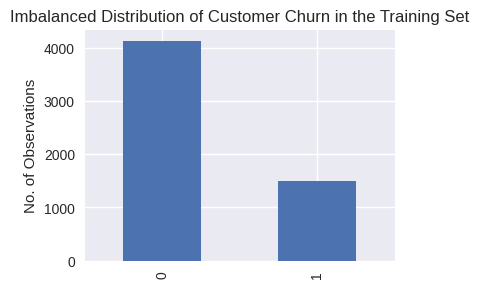

In [12]:
## Code for a simple barplot

plt.figure(figsize=(4, 3))
train['ChurnValue'].value_counts().plot(kind='bar')
plt.title('Imbalanced Distribution of Customer Churn in the Training Set')
plt.ylabel('No. of Observations')
plt.show()
plt.close()

We can do upsampling using Synthetic Minority Oversampling Technique (SMOTE)

In [13]:
# Separate target and predictors
X_train = train.drop('ChurnValue', axis=1)
y_train = train['ChurnValue']

# Initialize upsampling using automatic strategy
smote = SMOTE(
    sampling_strategy='auto',
    random_state=66
)

# Fit resampler on the training set only
X_train_resampled, y_train_resampled = smote.fit_resample(
    X_train,
    y_train
)

# Generate upsampled training set
train_resampled = pd.concat([X_train_resampled, y_train_resampled], axis=1)


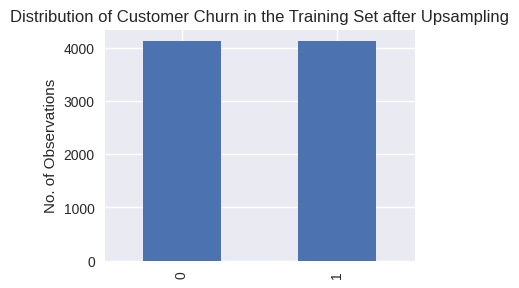

In [14]:
# Inspect imbalance via a barplot

plt.figure(figsize=(4,3))
train_resampled['ChurnValue'].value_counts().plot(kind='bar')
plt.title('Distribution of Customer Churn in the Training Set after Upsampling')
plt.ylabel('No. of Observations')
plt.show()
plt.close()

In [2]:
## Set up paths (to either save or import the datasets)

raw_train_path = 'clean_data/class_telco/raw_train.pkl'
upsampled_train_path = 'clean_data/class_telco/upsampled_train.pkl'
test_path = 'clean_data/class_telco/test.pkl'


In [17]:
## SAVE THE FILES

# Save the training set in its original form (not upsampled)
with open(raw_train_path, 'wb') as f:
    pickle.dump(train, f)

# Save the upsampled training set
with open(upsampled_train_path, 'wb') as f:
    pickle.dump(train_resampled, f)

# Save the test set (not upsampled)
with open(test_path, 'wb') as f:
    pickle.dump(test, f)
